<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/kn_lab8_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction
- Feature Elimination: You reduce the feature space by eliminating features. This has a disadvantage though, as you gain no information from those features that you have dropped.
- Feature Selection: You apply some statistical tests in order to rank them according to their importance and then select a subset of features for your work. This again suffers from information loss and is less stable as different test gives different importance score to features. 
- Feature Extraction: You create new independent features, where each new independent feature is a combination of each of the old independent features. These techniques can further be divided into linear and non-linear dimensionality reduction techniques.
- tSNE and PCA are feature extraction
- https://www.datacamp.com/community/tutorials/introduction-t-sne?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1009871&gclid=CjwKCAjwtNf6BRAwEiwAkt6UQn9Fh31RQWu68b19VdBqQhZWcl_EiKf-R1fW_5heDab7jEZLOYWqOxoCvHoQAvD_BwE

# PCA (Principal Component Analysis)
- breastcancer example
- use some important data only (about 30%), SelectPercentile
- tSNE 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cancer = load_breast_cancer()
X_all = cancer.data
y = cancer.target 
X_all = StandardScaler().fit_transform(X_all)

In [ ]:
X_all.shape

(569, 30)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## when using all 30 features

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
## 교차검증
cross_val_score(rfc, X_all, y, cv=5).mean().round(4)

0.9596

### Feature Selection: importance of feature selection:
- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces Overfitting.

### Chi-squared statistics (?): 
- 상관관계를 계산하여 우연히 어떤 관계가 발생한 것인지 아니면 충분히 연관성이 있는지 알려주는 방법.

## 6개의 특성만 사용하는 경우

### SelectPercentile():
- SelectPercentile(score_func, percentile): Select features according to a percentile 
of the highest scores.
- score_func : callable Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores. Default is f_classif. The default function only works with classification tasks.
- percentile : int, optional, default=10, Percent of features to keep.

- chi-square test: 두 범주형 변수간의 상관관계를 측정하는 통계적 기법이다. 카이스퀘어 테스트를 이용하여 귀무가설을 기초로 기대빈도를 계산하여 두 개 이상의 데이터 세트의 관찰빈도가 통계적으로 유의미한지를 측정한다. 테스트 결과에서 P value가 유의수준보다 낮으면 귀무가설은 기각되며, 반대인 경우 귀무가설은 채택된다.

In [ ]:
# fs = SelectPercentile(feature_selection.chi2, percentile = 20) # 영향력이 큰 상위 20% 만
# fs.fit(cancer.data, y)
# fs.get_support()

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
fs = SelectPercentile(chi2, percentile = 20)
sc = StandardScaler()
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)

In [ ]:
fs.get_support()   # 20% - 6개

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False])

In [ ]:
fs.scores_, fs.pvalues_

(array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
        1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
        2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
        2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
        1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
        4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
        3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
        1.29886140e+00, 2.31522407e-01]),
 array([8.01397628e-060, 3.32292194e-022, 0.00000000e+000, 0.00000000e+000,
        6.98631644e-001, 2.01012999e-002, 9.00175712e-006, 1.16563638e-003,
        6.11926026e-001, 9.93122221e-001, 3.89553429e-009, 9.21168192e-001,
        1.94877489e-056, 0.00000000e+000, 9.54425121e-001, 4.33366115e-001,
        3.06726812e-001, 5.80621137e-001, 9.92847410e-001, 9.36379753e-001,
        6.11324751e-109, 7.89668299e-040, 0.00000000e+000, 0.00000000e+000

In [ ]:
np.array(fs.scores_).argsort()[::-1]

array([23,  3, 13, 22,  2, 20,  0, 12, 21,  1, 26, 10,  6, 25, 27,  7,  5,
       28, 16, 15, 24, 17,  8, 29,  4, 11, 19, 14, 18,  9])

In [ ]:
cancer.feature_names[[23,3]]

array(['worst area', 'mean area'], dtype='<U23')

In [ ]:
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'], dtype='<U23')

In [ ]:
cross_val_score(rfc, X_P, y).mean().round(4)

0.928

## 2개의 특성만 사용하는 경우

In [ ]:
# 상위 6%의 유효한 특성만 선택 )
fs = SelectPercentile(chi2, percentile = 6)
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['mean area', 'worst area'], dtype='<U23')

In [ ]:
cancer.data.shape, X_P.shape

((569, 30), (569, 2))

In [ ]:
cross_val_score(rfc, X_P, y).mean().round(4)

0.9192

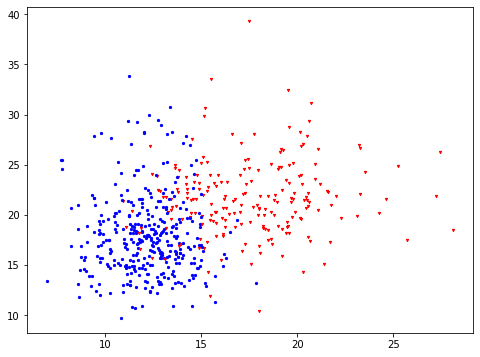

In [ ]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(cancer.data[:,0][i],cancer.data[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

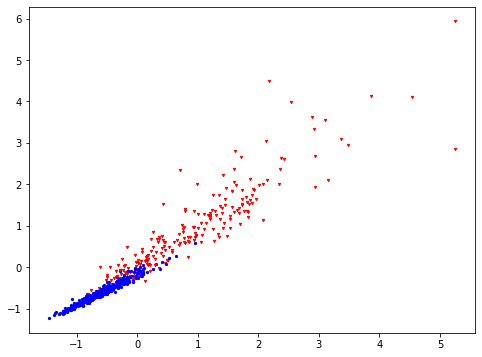

In [ ]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(X_P[:,0][i],X_P[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

## PCA로 두개의 차원만 사용하는 경우

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)

In [ ]:
pca_result #  after dimensionality reduction, there usually isn’t a particular 
           # meaning assigned to each principal component. The new components are 
           # just the two main dimensions of variation.

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

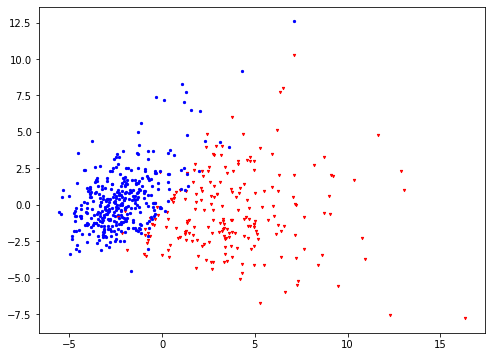

In [ ]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [ ]:
pca.components_.round(3) # 기존의 30개의 특성에 각각 어떤 가중치를 곱했는지 파악

array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275]])

In [ ]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_) # 각 주성분 요소들이 얼마나 데이터를
                                                                  # 잘 설명하는지 파악

(array([0.44272026, 0.18971182]), 0.6324320765155951)

## 2개의 주성분만 사용하여 분류를 수행

In [ ]:
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.9315

## 6개의 주성분만 사용하여 분류를 수행

In [ ]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X_all)
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.949

### 앞의 selectPercentile 보다 성능이 개선됨

# tSNE():
- 고차원의 데이터를 저차원으로 축소. visualization tool
- 고차원 공간에서 유클리드 거리를 데이터 포인트의 유사성을 표현하는 조건부 확률로 변환하는 방법
- t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.

## tSNE 시각화
- n_components: Dimension of the embedded space
- perplexity: float, optional (default: 30) : The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.(당혹, 곤혹), 데이터 점 xi의 유효한 근방의 개수의 척도

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(cancer.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.006s...
[t-SNE] Computed neighbors for 569 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.537079
[t-SNE] KL divergence after 1000 iterations: 0.210295


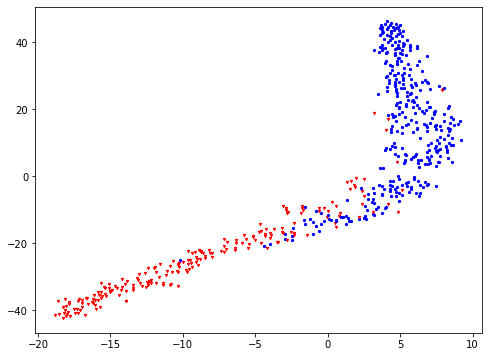

In [ ]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

### 표준화 후 시각화

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_all)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.884438
[t-SNE] KL divergence after 1000 iterations: 0.884536


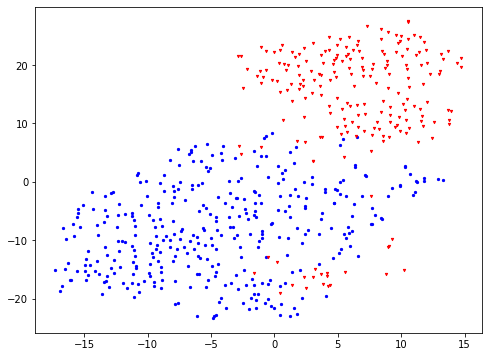

In [ ]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()